This code is not organized and the generation part is missing. This is for supplementary figure only

In [2]:
%matplotlib inline 


In [3]:
import os
import numpy as np
import csv
from matplotlib import pyplot as plt
from dotenv import load_dotenv
load_dotenv()

p = os.path.join(os.environ['WORKSPACE'], 'results/w3c_ss/intrinsic_analysis')

MAX_VAL = (1667 * 1666 / 2)

def extract_sim_diffs(t1, t2):
    m1 = []
    with open(os.path.join(p, 'fewer_mappers_{}.txt'.format(t1))) as f:
        for line in f:
            m1.append(line.strip())


    m2 = []
    with open(os.path.join(p, 'fewer_mappers_{}.txt'.format(t2))) as f:
        for line in f:
            m2.append(line.strip())


    res = []
    with open(os.path.join(p, '{}_vs_{}_fast_TCM_sim_fewer.csv'.format(t1, t2))) as f:
        for row in csv.DictReader(f):
            for k,v in row.items():
                if k.startswith('L'):
                    row[k] = float(v)
            res.append(row)

    res_map = {}
    for r in res:
        mapper1 = r['mapper1']
        if mapper1 not in res_map:
            res_map[mapper1] = {}
        res_map[mapper1][r['mapper2']] = [r['L1'], r['L2']]



    M = np.zeros([len(m1), len(m2)])
    for i,mapper1 in enumerate(m1):
        if mapper1 in res_map:
            for j,mapper2 in enumerate(m2):
                if mapper2 in res_map[mapper1]:
                    M[i][j] = res_map[mapper1][mapper2][0]
    
    return res_map, M




/var/folders/jl/fywysbss6b348fk_ncy9l7mr0000gn/T/ipykernel_88210/4106822605.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


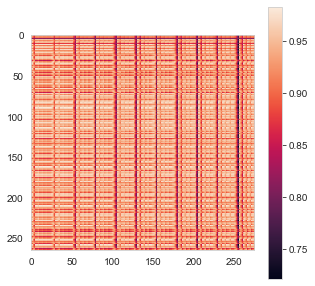

In [66]:
res_map, M = extract_sim_diffs('v3', 'v4')

plt.figure(figsize=(5,5))
plt.imshow(1- M / (1667 * 1666 / 2), interpolation='nearest')
plt.grid(False)
plt.colorbar()
plt.show()

/var/folders/jl/fywysbss6b348fk_ncy9l7mr0000gn/T/ipykernel_88210/2428710547.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


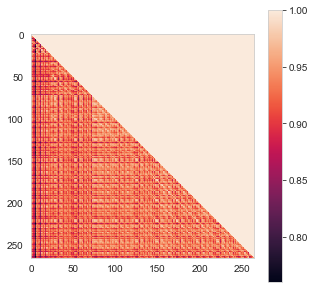

In [92]:
res_map, M = extract_sim_diffs('v3', 'v3')

plt.figure(figsize=(5,5))
plt.imshow(1- M / MAX_VAL, interpolation='nearest')
plt.grid(False)
plt.colorbar()
plt.show()

/var/folders/jl/fywysbss6b348fk_ncy9l7mr0000gn/T/ipykernel_88210/4224373001.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


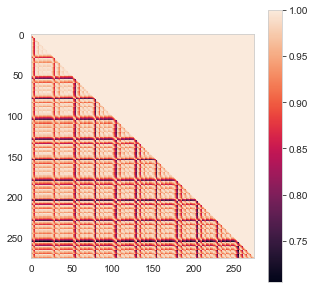

In [93]:
res_map, M = extract_sim_diffs('v4', 'v4')

plt.figure(figsize=(5,5))
plt.imshow(1- M / MAX_VAL, interpolation='nearest')
plt.grid(False)
plt.colorbar()
plt.show()

In [17]:
MAX_VAL = (1667 * 1666 / 2)

def get_best_worst(res_map):    
    best_pairs = []
    worst_pairs = []
    for i,mapper1 in enumerate(res_map.keys()):
        sorted_mappers = sorted([(k,v) for k,v in res_map[mapper1].items() if v < MAX_VAL], key=lambda x:x[1][0])
        mapper2, v = sorted_mappers[0]
        best_pairs.append((mapper1, mapper2, 1 - v[0] / MAX_VAL))
        mapper2, v = sorted_mappers[-1]
        worst_pairs.append((mapper1, mapper2, 1 - v[0] / MAX_VAL))

    len(best_pairs)


In [6]:
import pandas as pd
import seaborn as sns

res_map34, _ = extract_sim_diffs('v3', 'v4')
res_map33, _ = extract_sim_diffs('v3', 'v3')
res_map44, _ = extract_sim_diffs('v4', 'v4')

score_name = 'TCM similarity (normalized L1)'

def get_vals(res_map, name, filter1=None, filter2=None):
    return [{'m1': mapper1, 'm2': mapper2, score_name: 1 - L1score / MAX_VAL, 'name': name }
            for mapper1, vals in res_map.items() 
            if not filter1 or mapper1 in filter1
            for mapper2, (L1score, L2score) in res_map[mapper1].items()
            if not filter2 or mapper2 in filter2]

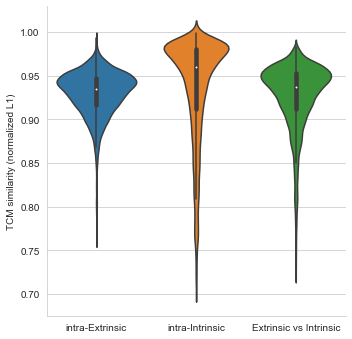

In [7]:
vals = get_vals(res_map33, 'intra-Extrinsic') + \
       get_vals(res_map44, 'intra-Intrinsic') + \
       get_vals(res_map34, 'Extrinsic vs Intrinsic')
df = pd.DataFrame(data=vals)


sns.set_style("whitegrid")
ax = sns.catplot(data=df, kind="violin", x="name", y=score_name)
ax.set(xlabel=None)

# plt.show()
plt.savefig(os.path.join(p, 'TCM-similarity.png'), dpi=200)



In [82]:
from scipy import stats

antypes = df['name'].drop_duplicates().to_list()

for i1,an1 in enumerate(antypes):
    for i2,an2 in enumerate(antypes):
        if i1 <= i2:
            F, p = stats.f_oneway(
                df[df['name'] == an1][score_name].to_numpy(),
                df[df['name'] == an2][score_name].to_numpy())
            print(an1, an2, 'p-value: ', p)

inter-Extrinsic inter-Extrinsic p-value:  1.0
inter-Extrinsic inter-Intrinsic p-value:  2.1539376313950573e-59
inter-Extrinsic Extrinsic vs Intrinsic p-value:  2.247932723907759e-32
inter-Intrinsic inter-Intrinsic p-value:  1.0
inter-Intrinsic Extrinsic vs Intrinsic p-value:  1.417618050183798e-192
Extrinsic vs Intrinsic Extrinsic vs Intrinsic p-value:  1.0


array([0.90948252, 0.89592586, 0.86099554, ..., 0.88140852, 0.79495355,
       0.94197871])

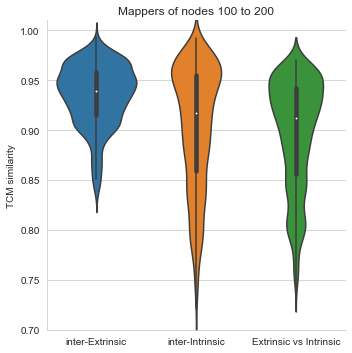

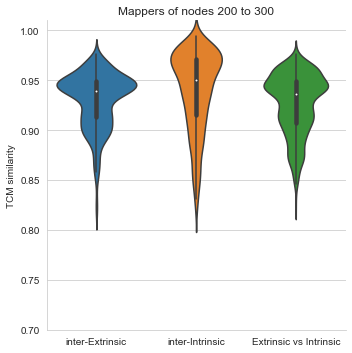

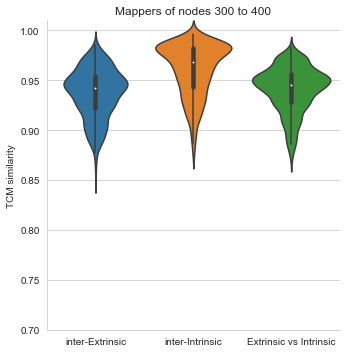

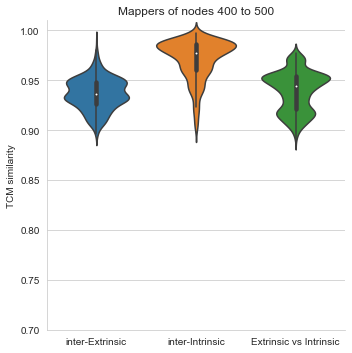

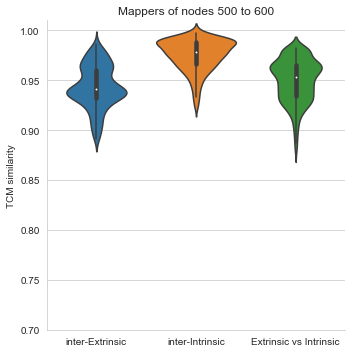

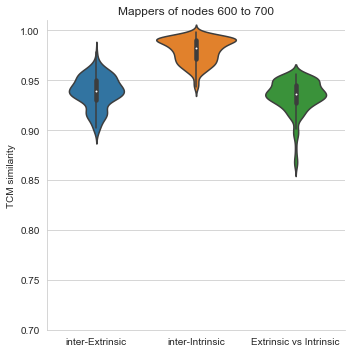

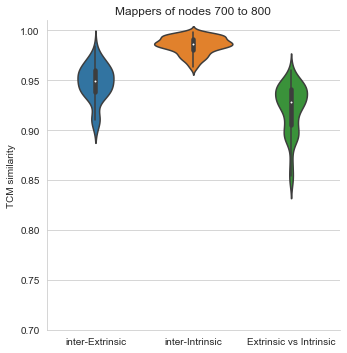

In [94]:


for i in range(100, 800, 100):
    nodes_interval = [i, i + 100]

    mappers_pick1 = {}
    with open(os.path.join(p, 'stats_timing_v3.csv')) as f:
        for row in csv.DictReader(f):
            nodes = int(row['nodes'])
            if nodes >= nodes_interval[0] and nodes <= nodes_interval[1]:
                mappers_pick1[row['mapper']] = True

    mappers_pick2 = {}
    with open(os.path.join(p, 'stats_timing_v4_fast.csv')) as f:
        for row in csv.DictReader(f):
            row['Mapper Type'] = 'intrinsic'
            nodes = int(row['nodes'])
            if nodes >= nodes_interval[0] and nodes <= nodes_interval[1]:
                mappers_pick2[row['mapper']] = True


    vals = get_vals(res_map33, 'inter-Extrinsic', mappers_pick1, mappers_pick1) + \
           get_vals(res_map44, 'inter-Intrinsic', mappers_pick2, mappers_pick2) + \
           get_vals(res_map34, 'Extrinsic vs Intrinsic', mappers_pick1, mappers_pick2)
    df = pd.DataFrame(data=vals)


    sns.set_style("whitegrid")
    ax = sns.catplot(data=df, kind="violin", x="name", y=score_name)
    ax.set(xlabel=None)
    ax.set(ylim=(0.7, 1.01))
    
    plt.title('Mappers of nodes {} to {}'.format(i, i+100))

    plt.show()




/var/folders/jl/fywysbss6b348fk_ncy9l7mr0000gn/T/ipykernel_64194/1169535355.py:47: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


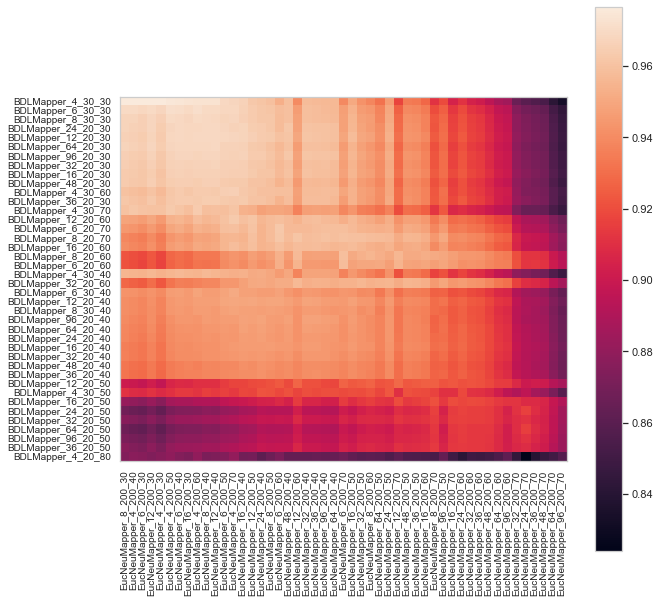

In [103]:
from matplotlib import pyplot as plt

mappers1_best = []
mappers2_best = []
mappers1_sofar = {}
mappers2_sofar = {}

all_sorted = sorted(
    [(mapper1, mapper2, L1score)
     for mapper1, vals in res_map.items()
     for mapper2, (L1score, L2score) in res_map[mapper1].items()],
    key=lambda x: x[2])

for mapper1, mapper2, L1score in all_sorted:
    if mapper1 in mappers_pick1 and mapper2 in mappers_pick2:
        if mapper1 not in mappers1_sofar:
            mappers1_sofar[mapper1] = True
            mappers1_best.append(mapper1)
        if mapper2 not in mappers2_sofar:
            mappers2_sofar[mapper2] = True
            mappers2_best.append(mapper2)

# for i,mapper1 in enumerate(m1):
#     if mapper1 in res_map:
#         if mapper1 in mappers_pick1:
#             mappers1_best.append(mapper1)
#         for k,v in sorted(list(res_map[mapper1].items()), key=lambda x:x[1][0]):
#             if k in mappers_pick2 and k not in mappers2_sofar:
#                 mappers2_sofar[k] = True
#                 mappers2_best.append(k)
#                 break
            
M = np.ones([len(mappers1_best), len(mappers2_best)]) * MAX_VAL
for i,mapper1 in enumerate(mappers1_best):
    if mapper1 in res_map:
        for j,mapper2 in enumerate(mappers2_best):
            if mapper2 in res_map[mapper1]:
                M[i][j] = res_map[mapper1][mapper2][0]


plt.figure(figsize=(10,10))
plt.imshow(1- M / MAX_VAL, interpolation='nearest')
plt.grid(False)

plt.xticks(range(len(mappers2_best)), mappers2_best, size='small', rotation=90)
plt.yticks(range(len(mappers1_best)), mappers1_best, size='small')
plt.colorbar()
plt.show()


In [115]:

best_pairs = []
worst_pairs = []
for i,mapper1 in enumerate(m1):
    if mapper1 in res_map:
        sorted_mappers = sorted(list(res_map[mapper1].items()), key=lambda x:x[1][0])
        mapper2, v = sorted_mappers[0]
        best_pairs.append((mapper1, mapper2, 1 - v[0] / MAX_VAL))
        mapper2, v = sorted_mappers[-1]
        worst_pairs.append((mapper1, mapper2, 1 - v[0] / MAX_VAL))
            
len(best_pairs)


265

In [116]:
worst_pairs




[('BDLMapper_4_10_30', 'EucNeuMapper_96_100_70', 0.7377183260826826),
 ('BDLMapper_4_10_40', 'EucNeuMapper_96_100_70', 0.7537060877380346),
 ('BDLMapper_4_10_50', 'EucNeuMapper_96_100_70', 0.7842808532411165),
 ('BDLMapper_4_10_60', 'EucNeuMapper_96_100_70', 0.7736073531752233),
 ('BDLMapper_4_10_70', 'EucNeuMapper_96_100_70', 0.773587822291484),
 ('BDLMapper_4_10_80', 'EucNeuMapper_24_200_70', 0.7793162980129065),
 ('BDLMapper_4_20_30', 'EucNeuMapper_96_100_70', 0.746958297896243),
 ('BDLMapper_4_20_40', 'EucNeuMapper_96_100_70', 0.7768902753182857),
 ('BDLMapper_4_20_50', 'EucNeuMapper_96_100_70', 0.7598860679484751),
 ('BDLMapper_4_20_60', 'EucNeuMapper_96_100_70', 0.7564619009931507),
 ('BDLMapper_4_20_70', 'EucNeuMapper_96_100_70', 0.7513488517662614),
 ('BDLMapper_4_20_80', 'EucNeuMapper_96_100_70', 0.7982175890152101),
 ('BDLMapper_4_30_30', 'EucNeuMapper_96_100_70', 0.7287090921791632),
 ('BDLMapper_4_30_40', 'EucNeuMapper_96_100_70', 0.7488357769742571),
 ('BDLMapper_4_30_50',

In [55]:
np.max(M[M > 0])

np.min()

0.7213249606261221

In [66]:
import pandas as pd

precision = 50

def _fix(row):
    row['nodes'] = int(row['nodes'])
    row['timing'] = float(row['timing'])
    row['aprox_nodes'] = round(row['nodes'] / precision) * precision
    return row

table = []
with open(os.path.join(p, 'stats_timing_v3.csv')) as f:
    for row in csv.DictReader(f):
        row['Mapper Type'] = 'extrinsic'
        row = _fix(row)
        table.append(row)
        
with open(os.path.join(p, 'stats_timing_v4.csv')) as f:
    for row in csv.DictReader(f):
        row['Mapper Type'] = 'intrinsic'
        row = _fix(row)
        table.append(row)
        
df = pd.DataFrame(data=table)
        

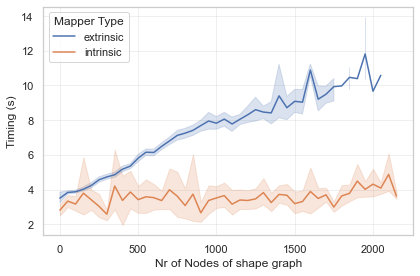

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style = "whitegrid")

g = sns.lineplot(data=df, x="aprox_nodes", y="timing", hue="Mapper Type")
g.set_ylabel("Timing (s)")
g.set_xlabel("Nr of Nodes of shape graph")
plt.tight_layout()
plt.grid(alpha=0.3)

# plt.show()
plt.savefig(os.path.join(p, 'timing_diffs.png'), dpi=200)
